<a href="https://colab.research.google.com/github/Filquichante/FFT-and-Signal-Processing-Project/blob/main/Traitement_Signal_Audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Préparatifs : imports de librairies, chargement du fichier... L'objectif est d'avoir le moins de librairies possible, puisqu'on veut tout réaliser "from scratch", c'est à dire à partir de rien (sans code volé sur le web ni de librairies qui mâchent le travail)

In [ ]:

import librosa                    #Permet d'ouvrir les fichiers audio
import numpy as np                #Permet de faire du calcul avec de grandes listes de nombres en plusieurs dimensions (des Arrays) :)
import matplotlib.pyplot as plt   #Pour afficher les Arrays dans de beaux graphiques sexys
from IPython.display import Audio   #Pour écouter facilement les sons transformés par le programme
from google.colab import drive    #Nécessaire pour accéder aux fichiers de mon drive privé depuis le lycée
drive.mount("/content/drive", force_remount=True)
import scipy

Mounted at /content/drive


In [ ]:
file, sample_rate = librosa.load(path="/content/drive/MyDrive/Enseignement Scientifique/lovefool.wav")   #Ce fichier se trouve sur mon drive privé, ce qui signifie qu'il ne sera pas accessible à un utilisateur extérieur. Ca m'attriste, mais le passage par un drive est nécessaire pour travailler au lycée. Cependant, si vous souhaitez reproduire les expériences, vous pouvez le faire avec votre propre drive, en adaptant les répertoires des fichiers

In [ ]:
#def normalize_signal(signal):                                                     #Pour avoir une fonction de normalisation à tout moment (on va beaucoup s'en servir)
#    return (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 2 - 1

def normalize_signal(signal):       #Cette fonction est peut être meilleure, car les filtres produisent des valeurs aberrantes au début du fichier
    p5 = np.percentile(signal, 10)  # 10ème percentile
    p95 = np.percentile(signal, 90)  # 90ème percentile
    range_val = p95 - p5
    if range_val == 0:
        return signal  # Évite la division par zéro si tous les points sont similaires
    return (signal - p5) / range_val * 2 - 1

In [ ]:
testfile1 = file[999:3047]                            #Toutes ces lignes servent à faire des tests avec différentes tailles d'Arrays numpy
#testfile1 = file[10000:200000]
#testfile1 = np.sin(np.arange(2000)/10)
#testfile1 = file[100:500]
x = file[999:3047]
testfile1 = normalize_signal(testfile1)

###Echauffement (hum les chevilles) avec des filtres passe-bas et passe-haut.
###Le passe-bandes en découle rapidement, donc on passe.

In [ ]:
def low_pass_filter(data, alpha):
    filtered_data = np.zeros_like(data)
    filtered_data[0] = data[0]  # Initialiser la liste filtrée avec la première valeur
    for i in range(1, len(data)):
        filtered_data[i] = (alpha * data[i] + (1 - alpha) * filtered_data[i - 1])   #C'est une formule standard pour calculer un passe-bas, avec une pondération exponentielle
    return filtered_data

def high_pass_filter(data, alpha):
    filtered_data = np.zeros_like(data)
    filtered_data[0] = data[0]  # Initialiser la liste filtrée avec la première valeur

    for i in range(1, len(data)):
        # Calcul de la différence
        derivative = data[i] - data[i - 1]
        # On ajoute la différence entre les deux points au *résultat* précedent
        filtered_data[i] = alpha * (filtered_data[i - 1] + derivative)

    return filtered_data



In [ ]:
testfile2 = low_pass_filter(testfile1,0.1)        #testfile2 a été passé dans un filtre passe bas
testfile2 = normalize_signal(testfile2)

testfile3 = high_pass_filter(testfile1,0.1)       #testfile3 a été passé dans un filtre passe haut
testfile3 = normalize_signal(testfile3)

<ipython-input-7-53411500b823>:8: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


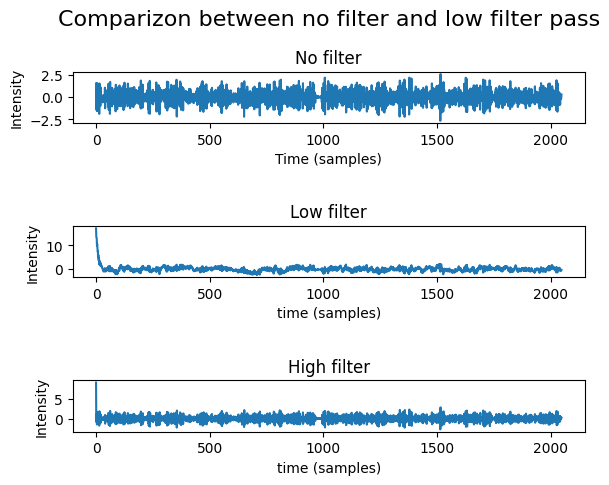

In [ ]:
# On affiche tout ça dans un joli graphique
fig, axs = plt.subplots(3, 1, constrained_layout=True)
axs[0].plot(testfile1)
axs[0].set_title('No filter')
axs[0].set_xlabel('Time (samples)')
axs[0].set_ylabel('Intensity')
fig.suptitle('Comparizon between no filter and low filter pass', fontsize=16)
fig.tight_layout()

axs[1].plot(testfile2)
axs[1].set_xlabel('time (samples)')
axs[1].set_title('Low filter')
axs[1].set_ylabel('Intensity')

axs[2].plot(testfile3)
axs[2].set_xlabel('time (samples)')
axs[2].set_title('High filter')
axs[2].set_ylabel('Intensity')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=.85,
                    wspace=0.4,
                    hspace=2)

plt.show()

In [ ]:
Audio(data=testfile1, rate=sample_rate)   #C'est le Fichier originel

In [ ]:
Audio(data=testfile2[100:], rate=sample_rate)   #Avec passe-bas. On ne prend pas les 100 premiers samples car Audio() normalise et que les premiers samples sont aberrants (long à expliquer)

In [ ]:
Audio(data=testfile3[:100], rate=sample_rate)   #Avec passe-haut

###Tentatives d'afficher les spectres des différents signaux obtenus, rapidement avortées car je ne suis pas sûr que ça ait vraiment fonctionné (mais peu importe, on entend bien la différence à l'oreille)
Cette partie n'est pas vraiment primordiale. Attention ici j'utilise une fonction FFT d'une librairie, car je n'ai pas encore rédigé le code de la FFT

In [ ]:
def plot_fft(signal, fs):
    n = len(signal)
    freqs = np.fft.fftfreq(n, 1/fs)
    fft_values = np.abs(np.fft.fft(signal))

    plt.plot(freqs[:n//2], fft_values[:n//2])
    plt.xlabel('Fréquence (Hz)')
    plt.ylabel('Amplitude')
    plt.title('FFT du signal')
    plt.grid(True)
    plt.show()

In [ ]:
def low_pass_plot_fft(signal, fs):
    n = len(signal)
    for i in np.linspace(0.1,1,3):
      freqs = np.fft.fftfreq(n, 1/fs)
      fft_values = np.abs(np.fft.fft(low_pass_filter(signal,i)))

      plt.plot(freqs[:n//2], fft_values[:n//2])
      plt.xlabel('Fréquence (Hz)')
      plt.ylabel('Amplitude')
      plt.title('FFT du signal')
      plt.grid(True)
    plt.show()

In [ ]:
def high_pass_plot_fft(signal, fs):
    n = len(signal)
    for i in np.linspace(0.1,1,3):
      freqs = np.fft.fftfreq(n, 1/fs)
      fft_values = np.abs(np.fft.fft(high_pass_filter(signal,i)))

      plt.plot(freqs[:n//2], fft_values[:n//2])
      plt.xlabel('Fréquence (Hz)')
      plt.ylabel('Amplitude')
      plt.title('FFT du signal')
      plt.grid(True)
    plt.show()

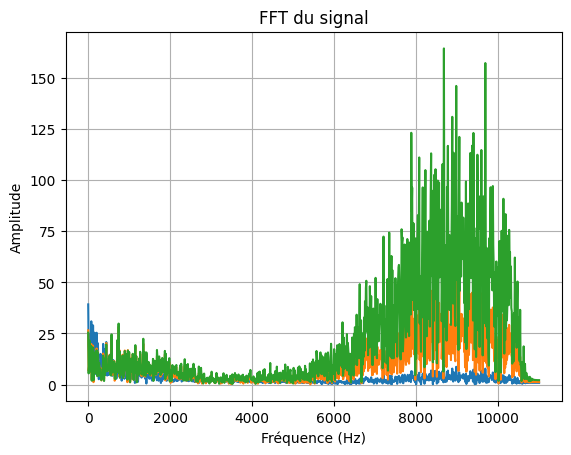

In [ ]:
low_pass_plot_fft(testfile1,sample_rate)

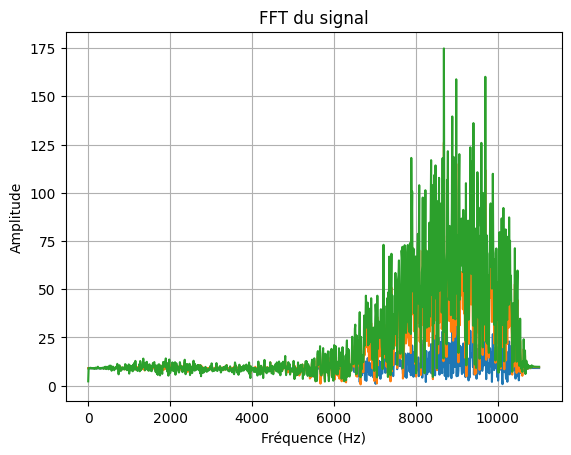

In [ ]:
high_pass_plot_fft(testfile3,sample_rate)

###Tentative d'implémentation de la DFT from scratch : là ça commence à devenir vraiment technique :)

In [ ]:
def DFT(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)  # Tableau pour stocker la transformée, complexe car la DFT inclut des nombres imaginaires
    for k in range(N):  # Pour chaque fréquence
        for n in range(N):  # Pour chaque point dans le signal temporel
            X[k] += x[n] * np.exp(-1j * 2 * np.pi * k * n / N)    #Formule de la DFT (utlise l'exponentielle complexe, donc pas besoin d'expliquer ça en détail à la classe)
    return X

In [ ]:
x = np.sin(np.arange(2048)/10)  # Un signal sinusoidal
X = DFT(x)                      # On veut voir ce qui se passe si on fait passer une sinusoidale dans la dft : normalement il n'y a qu'une seule bande de fréquence
print("DFT:", X)

magnitudes = np.abs(X)

DFT: [18.53883001+0.j         18.55604565+0.17264319j 18.60788774+0.34626424j
 ... 18.6949474 -0.52185958j 18.60788774-0.34626424j
 18.55604565-0.17264319j]


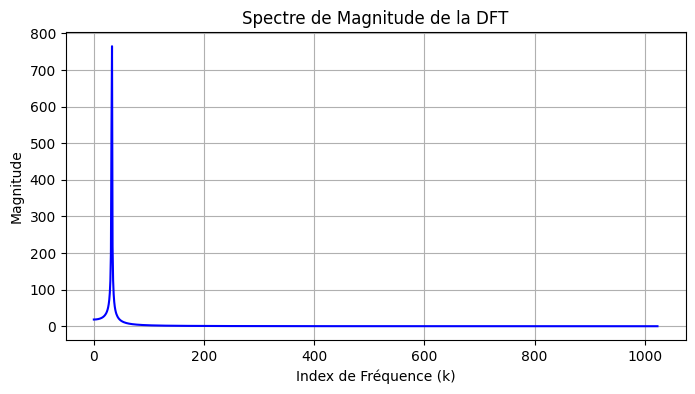

In [ ]:
#On veut maintenant afficher le résultat dans un graphique

half_index = len(magnitudes) // 2  # Trouver l'indice de la moitié : en effet, la DFT est symétrique, seule la première moitié est vraiment importante. Attention, il faut quand même garder toute la DFT afin de pouvoir recomposer le signal d'origine, ce qui est notre objectif à terme. En somme, on garde tout, mais on n'affiche que la moitié.
X_positive_frequencies = magnitudes[:half_index]

# Création du graphique de la magnitude, très élégant
plt.figure(figsize=(8, 4))
plt.plot(range(len(X_positive_frequencies)), X_positive_frequencies, 'b')
plt.title('Spectre de Magnitude de la DFT')
plt.xlabel('Index de Fréquence (k)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

###Maintenant la FFT : attention ça va chauffer !!!

In [ ]:
def FFT(x):   #Cette fonction est ridiculement petite, j'en laisserais presque couler une petite larme
    N = len(x)
    if N <= 1: return x
    even = FFT(x[0::2])     #Fonction récursive
    odd = FFT(x[1::2])      #Fonction récursive
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)] #Encore de l'exponentielle complexe. On utilise les racines de l'unité car elles ont la propriété d'avoir le même carré que leur opposé, ce qui est très partique pour notre algo récursif.
    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)] # On "réassemble" les produits des fonctions récursives, et on renvoie le résultat vers le premier appel de la fonction




In [ ]:
x = np.sin(np.arange(2048)/10)  # Un signal sinusoidal identique à celui plus haut (d'ailleurs redéclarer cette variable n'est pas vraiment nécessaire)
X = FFT(x)
print("FFT:", X)

magnitudes = np.abs(X)

FFT: [(18.538830013917693+0j), (18.556045650713397+0.17264319046595156j), (18.607887744346293+0.3462642420528189j), (18.694947403062045+0.5218595811653304j), (18.818228633096762+0.7004635099207797j), (18.979177644351395+0.8831690585829982j), (19.179726108424823+1.0711512858328573j), (19.42235083637304+1.2656941108731026j), (19.71015342267205+1.4682220289440266j), (20.046964830213422+1.6803384506438905j), (20.43748183860869+1.9038729644616716j), (20.887444996965506+2.1409406262734594j), (21.40387159664984+2.3940175454466885j), (21.9953628065769+2.6660387468315525j), (22.672512441898704+2.960526831846562j), (23.448457406781152+3.2817638127368354j), (24.339629223228343+3.6350244382114822j), (25.366796595281954+4.026898707288391j), (26.55653831486748+4.465746433641284j), (27.94336783753007+4.962351930944243j), (29.57287148036312+5.530890113657008j), (31.506471963459838+6.190392084455122j), (33.82889094792648+6.967040277354282j), (36.66027943875626+7.897898418604679j), (40.17681753602676+9.

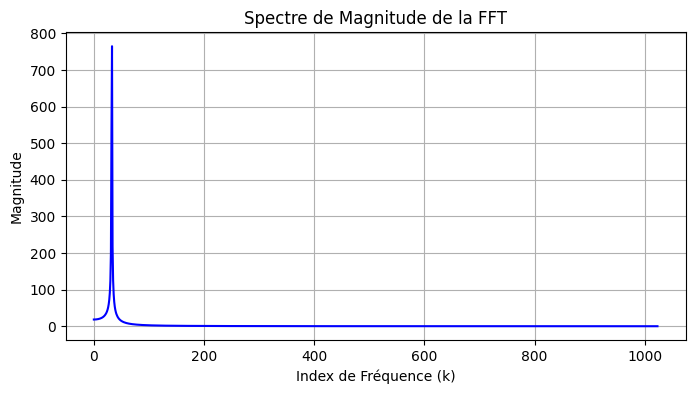

In [ ]:
# A nouveau, on veut afficher un beau graphique, avec la fft (et non pas la dft)

                                                #Pour rappel, la DFT est également le nom du résultat de l'algorithme de la FFT
#                                                                                  ||
#                                                                                \ || /
#                                                                                 \||/
#                                                                                  \/
half_index = len(magnitudes) // 2  # Trouver l'indice de la moitié : en effet, la DFT est symétrique, seule la primère moitié est vraiment importante. Attention, il faut quand même garder toute la DFT afin de pouvoir recomposer le signal d'origine, ce qui est notre objectif à terme
X_positive_frequencies = magnitudes[:half_index]

# Création du graphique de la magnitude, pour afficher la fft de la sinusoidale
plt.figure(figsize=(8, 4))
plt.plot(range(len(X_positive_frequencies)), X_positive_frequencies, 'b')
plt.title('Spectre de Magnitude de la FFT')
plt.xlabel('Index de Fréquence (k)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

###On affiche tout ça dans un beau graphique

In [ ]:
def plot_DFT_FFT(signal):
    # Calcul des transformées
    dft_result = DFT(signal)
    fft_result = FFT(signal)

    # Calcul des magnitudes pour l'affichage d'abord pour la dft, puis la fft
    N1 = len(signal)
    dft_magnitude = np.abs(dft_result)
    half_index = len(dft_magnitude) // 2  # Trouver l'indice de la moitié : en effet, la DFT est symétrique, seule la primère moitié est vraiment importante. Attention, il faut quand même garder toute la DFT afin de pouvoir recomposer le signal d'origine, ce qui est notre objectif à terme
    dft_magnitude = dft_magnitude[:half_index]

    fft_magnitude = np.abs(fft_result)
    half_index = len(fft_magnitude) // 2  # Trouver l'indice de la moitié : en effet, la DFT est symétrique, seule la primère moitié est vraiment importante. Attention, il faut quand même garder toute la DFT afin de pouvoir recomposer le signal d'origine, ce qui est notre objectif à terme
    fft_magnitude = fft_magnitude[:half_index]

    freqs = np.linspace(0, sample_rate / 2, N1 // 2, endpoint=False)  #Les fréquences que associées à chaque bande (échelle linéaire)

    # Préparation de la figure
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Affichage DFT
    axes[0].plot(freqs,dft_magnitude)
    axes[0].set_title('DFT Magnitude')
    axes[0].set_xlabel('Frequency (Hz)')
    axes[0].set_ylabel('Magnitude')

    # Affichage FFT
    axes[1].plot(freqs,fft_magnitude)
    axes[1].set_title('FFT Magnitude')
    axes[1].set_xlabel('Frequency (Hz)')
    axes[1].set_ylabel('Magnitude')

    # Ajustement de l'affichage
    plt.tight_layout()
    plt.show()

In [ ]:
x = file[10999:13047] # pour avoir 2048 éléments
Audio(data=x, rate=sample_rate)

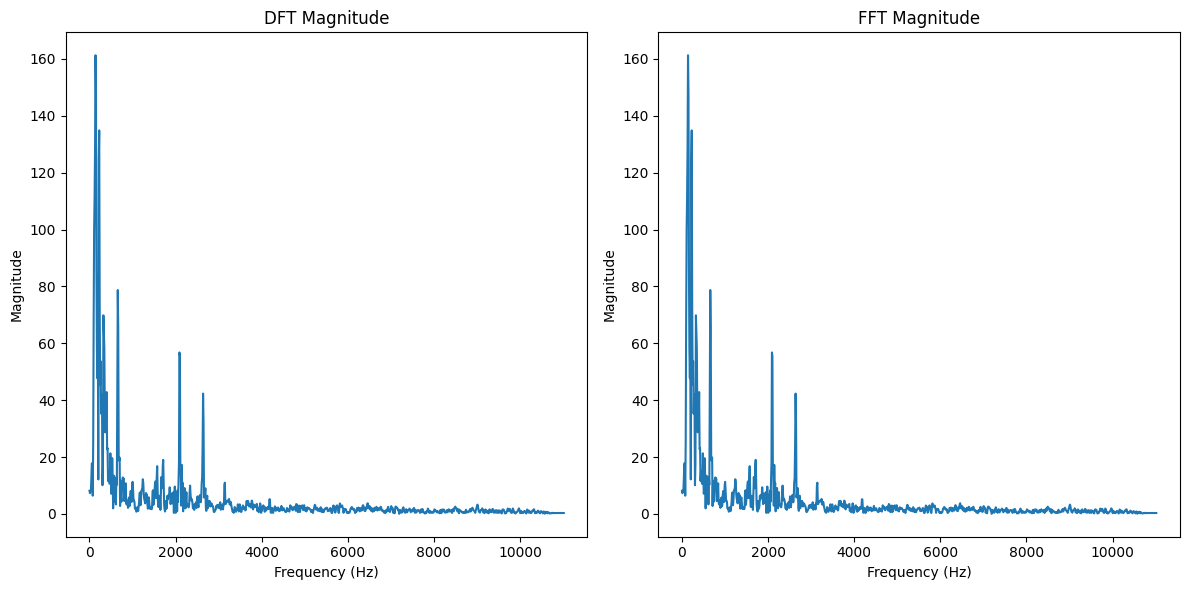

In [ ]:
plot_DFT_FFT(x)   #On observe que les deux sont sensiblement identiques, avec une microscopique marge (due à des arrondis)

In [ ]:
def compare_FFT(signal1,signal2,signal3,sample_rate):   #Cette fonction ressemble beaucoup à la précédente, donc il est possible de trouver les commentaires plus haut

    # Calcul des transformées
    fft_result1, N1 = FFT(signal1), len(signal1)
    fft_result2, N2 = FFT(signal2), len(signal2)
    fft_result3, N3 = FFT(signal3), len(signal3)

    fft_magnitude1 = np.abs(fft_result1)
    half_index1 = len(fft_magnitude1) // 2
    fft_magnitude1 = fft_magnitude1[:half_index]

    fft_magnitude2 = np.abs(fft_result2)
    half_index2 = len(fft_magnitude2) // 2
    fft_magnitude2 = fft_magnitude2[:half_index]

    fft_magnitude3 = np.abs(fft_result3)
    half_index3 = len(fft_magnitude3) // 2
    fft_magnitude3 = fft_magnitude3[:half_index]

    #Les fréquences associées
    freqs1 = np.linspace(0, sample_rate / 2, N1 // 2, endpoint=False)
    freqs2 = np.linspace(0, sample_rate / 2, N2 // 2, endpoint=False)
    freqs3 = np.linspace(0, sample_rate / 2, N3 // 2, endpoint=False)

    # Préparation de la figure
    fig, axes = plt.subplots(3, 1, figsize=(12, 6))

    # Affichage FFT
    axes[0].plot(freqs1[2:],fft_magnitude1[2:])
    axes[0].set_title('FFT Magnitude Signal Original')
    axes[0].set_xlabel('Frequency (Hz)')
    axes[0].set_ylabel('Magnitude')

    axes[1].plot(freqs2[2:],fft_magnitude2[2:])
    axes[1].set_title('FFT Magnitude With Low Pass')
    axes[1].set_xlabel('Frequency (Hz)')
    axes[1].set_ylabel('Magnitude')

    axes[2].plot(freqs3[2:],fft_magnitude3[2:])
    axes[2].set_title('FFT Magnitude With High Pass')
    axes[2].set_xlabel('Frequency (Hz)')
    axes[2].set_ylabel('Magnitude')

    # Ajustement de l'affichage
    plt.tight_layout()
    plt.show()

###Tout bien propre, pour que l'expérience en classe soit la plus fluide possible

In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
file, sample_rate = librosa.load(path="/content/drive/MyDrive/Enseignement Scientifique/experiences.m4a")  #Encore une fois, ce fichier ne sera pas accessible sans accès à mon drive (sauf erreur de ma part, et sauf si vous possédez de grands talents, et sauf si vous possédez mon mot de passe google)

<ipython-input-27-93213346181d>:1: UserWarning: PySoundFile failed. Trying audioread instead.
  file, sample_rate = librosa.load(path="/content/drive/MyDrive/Enseignement Scientifique/experiences.m4a")
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [ ]:
file = normalize_signal(file)
low_pass_file = normalize_signal(low_pass_filter(file, 0.02))
high_pass_file = normalize_signal(high_pass_filter(file, 0.02))

In [ ]:
Audio(data=file[1000:], rate=sample_rate)   #C'est le Fichier originel

In [ ]:
Audio(data=low_pass_file[1000:], rate=sample_rate)

In [ ]:
Audio(data=high_pass_file[1000:], rate=sample_rate)

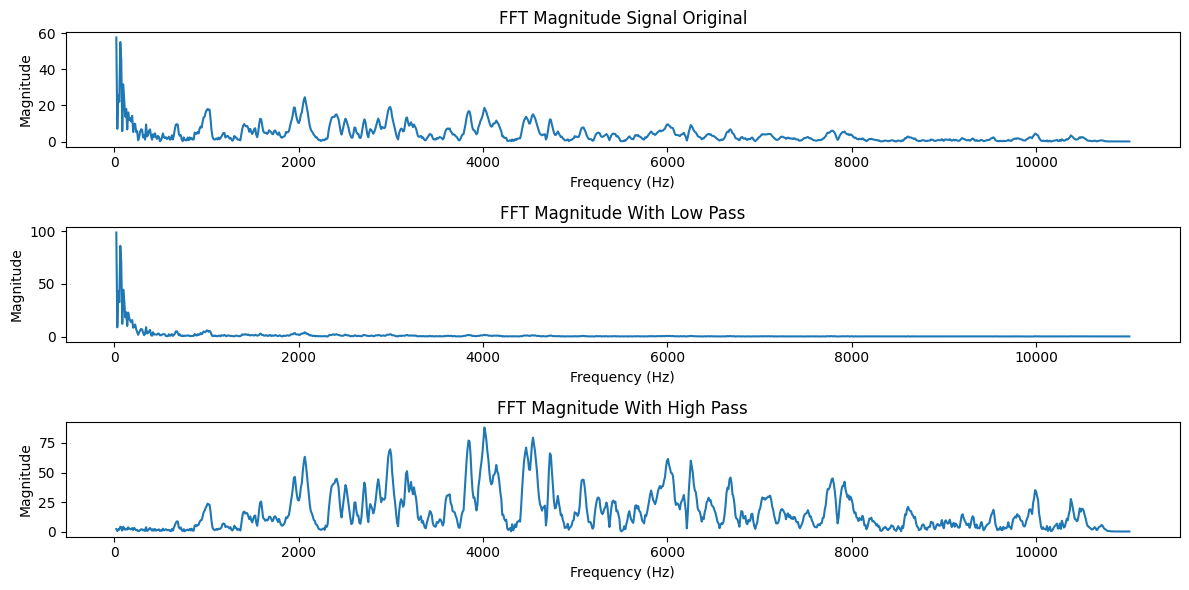

In [ ]:
sample_choice = 50000              #Pour choisir un bon spot, où on verra bien la différence entre les différents filtres
taille_extrait = 2048              #Une puissance de deux, c'est nécessaire pour la plupart des versions de la fft (pas pour la DFT)
compare_FFT(file[sample_choice:(sample_choice+taille_extrait)],
            low_pass_file[sample_choice:(sample_choice+taille_extrait)],
            high_pass_file[sample_choice:(sample_choice+taille_extrait)],
            sample_rate)

